# Jupyter Notebook: Prioritization of Syphilis Serologies for Investigation (Modernizing the Syphilis Reactor Grid)

##### Cell number 1: This cell is for importing python libraries to support the codes that have been used in this Notebook.

In [1]:
# Cell number 1

import sys
import pandas as pd
import numpy as np
import os
import textwrap
import datetime as dt
from IPython.display import Image

##### Cell number 2: Jupyter Notebook cells output only 1 result. This enables the cell to output all the results as an outcome of the script in the cell.

In [2]:
# Cell number 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##### Cell number 3: This is the script to import and read the CSV file. Please copy/paste the address of your file in place of "Please enter your file path and file name here.csv".
##### This file is read into a DataFrame: df_main

In [3]:
#Cell number 3

df_main = pd.read_csv("Please enter your file path and file name here.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Cell number 4: Displays the column names of the imported file ( saved as df_main) and the first 5 lines of your uploaded dataframe

In [ ]:
#Cell number 4
df_main_columns = df_main.columns
df_main.columns = [x.strip() for x in df_main.columns]
df_main.columns
df_main.head()

##### Cell number 5: This changes the column names for the dataframe. The DataFrame might contain more elements than is required for this algorithm. Those column names can be left as is. Please change the corresponding column names for the following data elements to:
###### Unique identifier for an individual: ID_Profile
###### Name of the test (e.g. VDRL, RPR, TP-AB, FTA-ABS): DS_Test
###### Date of the above test (specimen collected): DT_Specimen
###### Quantitative result for test (titer): DS_QuantitativeResult
###### Qualitative result for test: DS_QualitativeResult
###### Gender: CD_Gender
###### Age: Age_clean
###### DS_Disposition: Disposition assigned 
###### DT_Disposition: Date the disposition was assigned by the DIS (or the STD program)
##### For example, if the output of cell number 4 is: 
##### ['columnA', 'UniqueIdentifier', 'columnB', 'QualitativeResult','DateOfSpecimen', 'columnC', 'QuantitativeResult', 'NameOfTest', 'columnD','Gender',' Age', 'DS_Disposition','DT_Disposition']
##### The script will be as below:

In [5]:
#Cell number 5

df_main.columns = ['columnA', 'ID_Profile', 'columnB', 'DS_QualitativeResult','DT_Specimen', 'columnC', 'DS_QuantitativeResult', 'DS_Test', 'columnD','CD_Gender','Age_clean', 'DS_Disposition','DT_Disposition']

###### Cell number 6: The CSV file does not have date attributes. The script below will assign date attribute to this column. The same script can be used for any other date elements. 
### The CSV file must contain date the date in the YYYY-MM-DD format. If it is not possible to create it in this format, please let me know.
###### The third line creates a new column and assigns the index number of the row to it. This will be used to join on at later stages


In [ ]:
#Cell number 6 
df_main['DT_Specimen'] = df_main['DT_Specimen'].astype(str)
df_main['DT_Specimen'] = [x.strip() for x in df_main['DT_Specimen']]
df_main['DT_Specimen'] = pd.to_datetime(df_main['DT_Specimen'],format="%Y-%m-%d")
#similarly for DT_Disposition
df_main['DT_Disposition'] = df_main['DT_Disposition'].astype(str)
df_main['DT_Disposition'] = [x.strip() for x in df_main['DT_Disposition']]
df_main['DT_Disposition'] = pd.to_datetime(df_main['DT_Disposition'],format="%Y-%m-%d")

df_main['S_No'] = df_main.index

###### Cell number 7: 
### The database might default titers as '1:x', the following code removes the '1:' part from it and converts it to an integer
### Only use the script below if the quantitative result in the dataframe is not extracted as a number.
###### The script below takes away "1:" from, converts it into a number,   and converts nan (No value) to 0

In [ ]:
#Cell number 7

df_main['DS_QuantitativeResult'] = df_main['DS_QuantitativeResult'].astype(str)
df_main['DS_QuantitativeResult'] = [x.strip() for x in df_main['DS_QuantitativeResult']]
df_main['DS_QuantitativeResult'].value_counts()

def cleanquant(a):
    if a == 'nan':
        return 0
    else:
        return (a[2:])
    
df_main['quanttest']=df_main['DS_QuantitativeResult'].apply(cleanquant)
df_main['quanttest']=df_main['quanttest'].astype(int)
df_main['quanttest'].dtype
df_main['quanttest'].value_counts()

###### Cell number 8: If the quantitative result or titer was a number in the data extract and cell number 7 was not required, we change the column name to 'quanttest'
## Run Cell number 8 customized to the column headings, labelling the column with titer results (quantitative results) as quanttest, only if cell number 7 was not required

In [11]:
#Cell number 8

#df_main.columns = ['columnA', 'ID_Profile', 'columnB', 'DS_QualitativeResult','DT_Specimen', 'columnC', 'quanttest', 'DS_Test', 'columnD','CD_Gender','Age_clean']


###### Cell number 9: As part of data-wrangling, the following script ensures that the values for 'ID_Profile', 'DS_QualitativeResult', and 'DS_Test' do not contain any spaces and are in string format.

###### The data type displayed should show :
###### ID_Profile: object
###### DS_Test: object
###### DT_Specimen: datetime64[ns]
###### DS_QuantitativeResult: object
###### quanttest: int32
###### CD_Gender: object
###### Age_clean: int32
###### DS_Dispositions: object
###### DT_Disposition: datetime64[ns]

In [ ]:
#Cell number 9


df_main['ID_Profile']= df_main['ID_Profile'].astype(str).str.strip()
df_main['DS_QualitativeResult'] = df_main['DS_QualitativeResult'].astype(str)
df_main['DS_QualitativeResult'] = [x.strip() for x in df_main['DS_QualitativeResult']]
df_main['DS_Test'] = df_main['DS_Test'].astype(str)
df_main['DS_Test'] = [x.strip() for x in df_main['DS_Test']]
df_main['CD_Gender'] = df_main['CD_Gender'].astype(str)
df_main['CD_Gender'] = [x.strip() for x in df_main['CD_Gender']]
df_main['DS_Disposition'] = df_main['DS_Disposition'].astype(str)
df_main['DS_Disposition']= df_main['DS_Disposition'].astype(str).str.strip()
df_main.dtypes

###### Cell number 10: Removes all tests with no dates (they can't be calculated in the algorithm) and reveals how many rows and columns are there in the DataFrame

In [ ]:
# Cell number 10
nulldates = df_main[df_main['DT_Specimen'].isnull()]
len(np.unique(nulldates['ID_Profile']))
nulldates_idx = nulldates.index

df_main = df_main.drop(nulldates_idx)
df_main.shape
len(np.unique(df_main['ID_Profile']))


###### Cell number 11: Creating a DataFrame for running the algorithm with only the essential columns. Since we select the core data elements, we remove duplicates (same person, same test, same result, same day). The row index is created as a separate column. This index_no will be used to join the rest of the data elements for analysis later on
###### We display the number of rows and columns in this DataFrame. There should be 8 columns, the rows depend on how big the dataset is

In [ ]:
# Cell number 11

df_main_dd = df_main[['ID_Profile','DS_Test','DT_Specimen','quanttest','DS_QualitativeResult','DT_Disposition']]
df_main_dd = df_main_dd.drop_duplicates()
df_main_dd['index_no'] = df_main_dd.index

df_main_dd = df_main_dd.merge(df_main, left_on = 'index_no', right_on = 'S_No', how = 'left')

#if there is an error, see below
df_main_dd = df_main_dd[['ID_Profile_x', 'DS_Test_x', 'DT_Specimen_x', 'quanttest_x',
                         'DS_QualitativeResult_x','DT_Disposition_x', 'index_no', 'CD_Gender',
                         'DS_Disposition', 'Age_clean']]


df_main_dd.columns = ['ID_Profile','DS_Test','DT_Specimen','quanttest','DS_QualitativeResult', 'DT_Disposition','index_no','CD_Gender', 'DS_Disposition', 'Age_clean']
#df_main_dd.head()
df_main_dd.shape


#if there is an error:
    #It could be because the column names did not match
    #In a separate cell, please run
    #df_main_dd.dtypes
    
    #under the comment above, please insert how the column name appears in your output in place of these fields above:
    #['ID_Profile_x', 'DS_Test_x', 'DT_Specimen_x', 'quanttest_x',
    #'DS_QualitativeResult_x', 'index_no', 'CD_Gender',
    #'DS_Disposition', 'Age_clean']

###### Cell number 12: This is were we define all of our variables. This ensures that we don't have to modify the codes everytime and can just make some adjustments here

In [13]:
# Cell number 12 

#Step 7 allows for a cut-off date for titers since we found that titers can be from a long time ago and should not be compared.
#This can be modified anytime. We define the duration as 'DaysBetweenTests'
DaysBetweenTests = 365

#Step 7 quantifies what should be considered a high titer, given that the previous test is much older
#This can be modified anytime. We define the titer cutoff as 'TiterCutOff'
TiterCutOff = 32

#'Female' maybe coded in many foms, please assign the exact variable as it is in your DataFrame
Female = 'F'

#Step 7 also considers female of reproductive age, to prevent congenital syphilis. We have set the cut-off age as 50
#This can be modified anytime. We define the age as 'FemaleAge'
FemaleAge = 50

#Step 7 was added, in part, to prevent congenital syphilis. For the general population, older titer is considered > 1year
#For females of reproductive age, we consider the duration as 180 days and high titer as more than 1:9
#This can be modified anytime. We define the duration as 'FemaleDaysBetweenTests' and the titer as 'FemaleTiterCutOff'
FemaleDaysBetweenTests = 180
FemaleTiterCutOff = 8

#Step 5: We found that if patient was not previously treated, their titer might not change and can be reached now
#Please assign the exact disposition that the DIS had assigned corresponding to an individual who was infected but not treated
disposition_InfNotTx = 'Infected, Not Treated'
#Please assign the exact disposition that the DIS had assigned corresponding to an individual who was uable to be located
unable_to_locate = 'Unable to Locate'
#Please assign the exact disposition that the DIS had assigned corresponding to an individual who was out of jurisdiction
OOJ = 'Administrative Closure OOJ'

# Please assign values to the corresponding variable as it appears in your dataframe:
#R is for reactive tests
R = 'R'
#W is for weakly positive/reactive tests
W = 'W'
#U is for unknown
U = 'U'
#P is for positive. RAPID tests seem to be assigned this qualitative result
P = 'P'
#N is for negative tests
N = 'N'

#Please assign how each non-Treponemal Test is coded in your dataframe. ONLY these 5 tests will be considered as NTTs.
RPR = 'RPR'
VDRL = 'VDRL'
CSF_VDRL = 'CSF-VDRL'
RPR_CordBlood = 'RPR Cord Blood'
TRUST = 'TRUST'

#Please assign how each Treponemal Test is coded in your dataframe. ONLY these10 tests will be considere as TTs.
FTA_ABS = 'FTA-ABS'
IgG_EIA = 'IgG EIA'
TP_AB = 'TP-AB'
TP_PA = 'TP-PA'
RAPID = 'RAPID'
EIA = 'EIA'
MHATP = 'MHATP'
FTA_IgG = 'FTA-IgG'
CIA = 'CIA (CLIA)'
TPHA = 'TPHA'


## Do not run the script for the image below

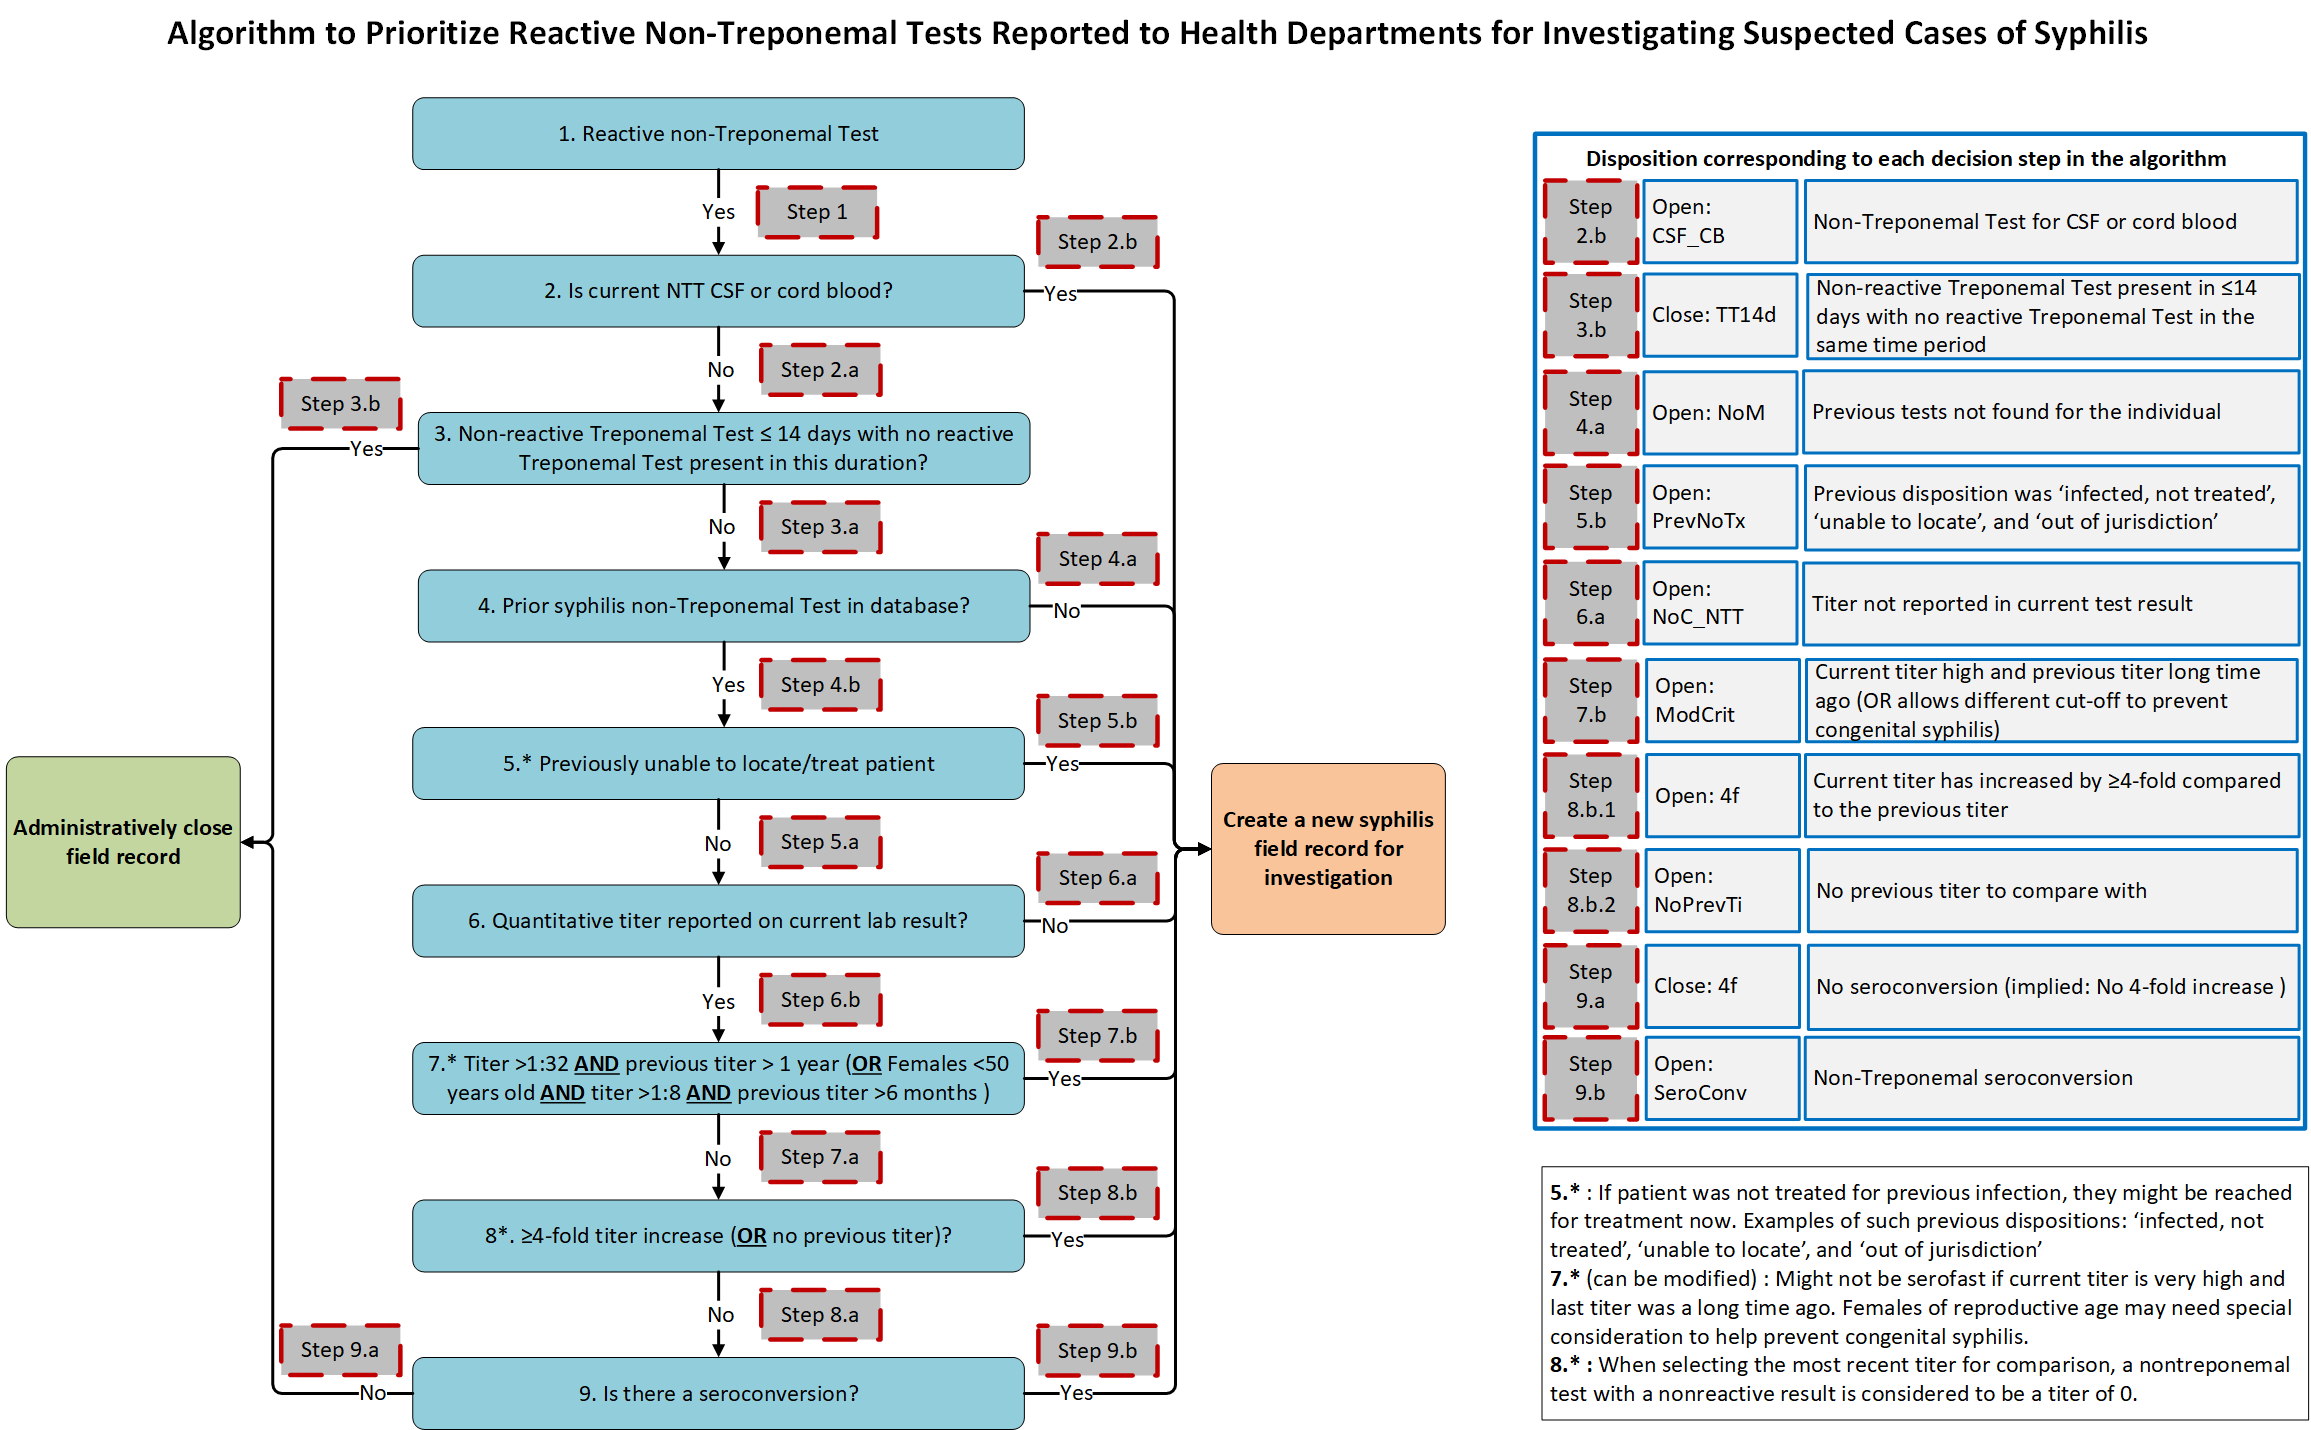

In [37]:
Image('Algorithm to Prioritize Reactive NonTreponemal Tests Reported to Health Departments for Investigating Suspected Cases of Syphilis.png')

## Step 1: select only reactive Non-Treponemal Tests (NTT)
#### Cell number 13 selects the tests for Step 1 in the algorithm

In [ ]:
df_main_6m_ntt = df_main_dd[(df_main_dd['DS_Test'] == RPR) | (df_main_dd['DS_Test'] == VDRL)|(df_main_dd['DS_Test']==CSF_VDRL)|(df_main_dd['DS_Test']==RPR_CordBlood)|(df_main_dd['DS_Test']==TRUST)]
df_main_6m_ntt = df_main_6m_ntt[(df_main_6m_ntt['DS_QualitativeResult']==R) | (df_main_6m_ntt['DS_QualitativeResult']==W) | (df_main_6m_ntt['DS_QualitativeResult']==U)]
df_main_6m_ntt = [group[group['DT_Specimen'] == group['DT_Specimen'].max()] for name , group in df_main_6m_ntt.groupby("ID_Profile")]
df_main_6m_ntt = pd.concat(df_main_6m_ntt)

df_main_6m_ntt['DS_Test'].value_counts()
df_main_6m_ntt.shape


#### Cell number 13.1. We want to identify the first test in the latest DT_Disposition (episode of disease). Ideally, we would want to assign a disposition to this first test

In [ ]:
#13.1

list1 = np.unique(df_main_6m_ntt['ID_Profile'])

len(list1)
df_first_test = pd.DataFrame(columns=['ID_Profile','DS_Test','DT_Specimen','quanttest','DS_QualitativeResult','CD_Gender', 'Age_clean','DT_Disposition','index_no'])
#list1 = list1[:10]

#list1 = ['1395824']
for i in list1:
    IncTest = df_main_6m_ntt[df_main_6m_ntt['ID_Profile']==i]
    time_IncTest = IncTest['DT_Disposition']
    time_IncTest = time_IncTest.values[0]
    
    df_all = df_main[df_main['ID_Profile']==i]
    
    df_all = df_all[(df_all['DS_Test'] == RPR) | (df_all['DS_Test'] == VDRL)|(df_all['DS_Test']==CSF_VDRL)|(df_all['DS_Test']==RPR_CordBlood)|(df_all['DS_Test']==TRUST)]
    
    
    
    df_sameDT = df_all[df_all['DT_Disposition']==time_IncTest]
    df_earliestTest = [group[group['DT_Specimen'] == group['DT_Specimen'].min()] for name , group in df_sameDT.groupby("ID_Profile")]

    df_earliestTest = pd.concat(df_earliestTest)
    df_first_test=df_first_test.append(df_earliestTest)   
#df_first_test['DT_Disposition'].value_counts()
df_first_test

In [ ]:
df_main_6m_ntt = df_first_test

df_main_6m_ntt['DS_Test'].value_counts()
df_main_6m_ntt.shape

##### Cell number 14: A list (profile_list) is created with distinct unique identifiers. This profile list is used to loop in the program. 
##### A single unique identifier (ID_Profile) or a subset can be run by creating a list of the subset as profile_list. This is especially useful to debug the process and view a specific subset instead of running the entire dataset

In [43]:
# Cell number 14:
profile_list = df_main_6m_ntt['ID_Profile'].unique()
profile_list
len(profile_list)

In [44]:
#An example of cell 14 to run a single individual's profile or a fractin (e.g. first 100) of the dataframe
#profile_list = ['1030379']
profile_list = profile_list[:100]

##### An example of cell 14 to run a fraction of the dataset (for e.g. a cut-off date) instead of the entire dataset. This will be useful to see if there are any bugs or issues.

In [ ]:


#baseline_date = pd.to_datetime('20190318', format='%Y%m%d') #---->change the date within the '' to what you'd like
#baseline_date
#df_main_6m_ntt = df_main_dd[df_main_dd['DT_Specimen'] >= baseline_date]


#df_main_6m_ntt = df_main_dd[(df_main_dd['DS_Test'] == RPR) | (df_main_dd['DS_Test'] == VDRL)|(df_main_dd['DS_Test']==CSF_VDRL)|(df_main_dd['DS_Test']==RPR_CordBlood)]
#df_main_6m_ntt = df_main_6m_ntt[(df_main_6m_ntt['DS_QualitativeResult']==R) | (df_main_6m_ntt['DS_QualitativeResult']==W) | (df_main_6m_ntt['DS_QualitativeResult']==U)]
#df_main_6m_ntt = [group[group['DT_Specimen'] == group['DT_Specimen'].max()] for name , group in df_main_6m_ntt.groupby("ID_Profile")]
#df_main_6m_ntt = pd.concat(df_main_6m_ntt)

#df_main_6m_ntt['DS_Test'].value_counts()
#df_main_6m_ntt.shape

## All of the code for the algorithm is below in cell number 1
### Each loop corresponding to the Step number in the algorithm is assigned that loop number.
### Apart from the disposition assigned in the algorithm, tests are also assigned the exact decision point (for debugging and testing).
### Steps are numbered and commented at every decision node. In case there is an issue with the code, we can print each step to determine where the problem lies.


In [ ]:
count = 0
dispo_type = 0


df_complete_merged = pd.DataFrame(columns = ['ID_Profile', 'DS_Test_x', 'DT_Specimen_x', 'quanttest_x',
       'DS_QualitativeResult_x', 'CD_Gender_x', 'Age_clean_x', 'index_no',
       'algo_dispo', 'dispo', 'dis_type', 'DS_Test_y', 'DT_Specimen_y',
       'quanttest_y', 'DS_QualitativeResult_y', 'CD_Gender_y', 'Age_clean_y'])

#1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
for profile_id in profile_list:
    #profile_id
    count = count+1
    sero = 0 
    algo_dispo = 'NA'
    al_dis = 'NA'
    test_tocompare = pd.DataFrame(columns = ['ID_Profile','DS_Test','DT_Specimen','quanttest','DS_QualitativeResult','CD_Gender', 'Age_clean'])
    test_incoming = pd.DataFrame(columns = ['ID_Profile','DS_Test','DT_Specimen','quanttest','DS_QualitativeResult','CD_Gender', 'Age_clean','index_no'])
    
    
    #Dataframe df_incoming_test isolates the tests for that particular profile_id. We will identify the incoming test from this
    df_incoming_test = df_main_6m_ntt[df_main_6m_ntt['ID_Profile'] == profile_id]

#!!!!!!!!!! This is taking in the reactive nontreponemal tests. We intend to assign a disposition to these tests, whether to administratively close or open for investigation !!!!!!
    
    #print('df_incoming_test')
    #df_incoming_test
    
    #We first select the latest test as (test_incoming)
    if len(df_incoming_test.index) > 1:
        incoming_test = [group[group['DT_Specimen'] == group['DT_Specimen'].max()] for name , group in df_incoming_test.groupby("ID_Profile")]
        test_incoming = pd.concat(incoming_test)
        #print('Step 1: Pass')
    else:
        test_incoming = df_incoming_test
        #print('Step 2: Pass')
    #print('test_incoming')
    #test_incoming

    #!!!!!!!!!! We identified test_incoming as THE TEST to assign this disposition !!!!!!

    #time_of_test is the time the specimen was collected for 'test_incoming', it will be used for decision logic below
    time_of_test = pd.to_datetime(test_incoming['DT_Specimen'].values[0])           
    #print('Step 3: Pass')
    #print('time_of_test')
    #time_of_test
    
    #Creating a dataframe df_match which has all the tests for all tests
    
    #!!!!!!!!!! df_match contains the entire dataset; we use this to identify the matches for the test !!!!!!
    df_match = df_main_dd[df_main_dd['ID_Profile'] == profile_id]
    
    #Creating a ataframe 'df_match_all' which has all the tests before 'time_of_test' for each individual ID_Profile
    df_match_all=df_match[df_match['DT_Specimen']<time_of_test]
    
    
    #Creating a ataframe 'TT_tocompare' which has all the nonreactive treponemal tests before for each individual ID_Profile
    TT_tocompare = df_match
    #print('Step 4: Pass')
    #test_tocompare
    TT_tocompare = TT_tocompare[(TT_tocompare['DS_QualitativeResult'] != R)]
    TT_tocompare = TT_tocompare[(TT_tocompare['DS_QualitativeResult'] != W)]
    TT_tocompare = TT_tocompare[(TT_tocompare['DS_QualitativeResult'] != U)]
    TT_tocompare = TT_tocompare[(TT_tocompare['DS_QualitativeResult'] != P)]
                
    #print('Step 5: Pass')
    #test_tocompare
    TT_tocompare = TT_tocompare[(TT_tocompare['DS_Test'] == FTA_ABS)|(TT_tocompare['DS_Test'] == IgG_EIA)|
                                (TT_tocompare['DS_Test'] == TP_AB)|(TT_tocompare['DS_Test'] == TP_PA)|
                               (TT_tocompare['DS_Test'] == RAPID)|(TT_tocompare['DS_Test'] == EIA)|
                                (TT_tocompare['DS_Test'] == MHATP)|(TT_tocompare['DS_Test'] == FTA_IgG)|
                                (TT_tocompare['DS_Test'] == CIA)|(TT_tocompare['DS_Test'] == TPHA)]

    
    TT_tocompare = TT_tocompare[~(TT_tocompare['DT_Specimen']>time_of_test)]
    
    #if len(TT_tocompare)>1:
        #seroconv1 = [group[group['DT_Specimen'] == group['DT_Specimen'].max()] for name , group in TT_tocompare.groupby("ID_Profile")]
        #seroconv1 = pd.concat(seroconv1)
    #else:
        #seroconv1 = TT_tocompare
    
    #print('Step 6: Pass')         
    #print('test_tocompare')
    #TT_tocompare
    
    #Creating a marker step_2b. It is 1 when 2.b condition is met, otherwise it is 0.
    #step_3b == 0 allows to progress on path 2.a
    step_3b = 0
    
    csf_cord = test_incoming[(test_incoming['DS_Test']==CSF_VDRL)|(test_incoming['DS_Test']==RPR_CordBlood)]
    
    #Step 2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222
    #As per Step 2: current titer CSF or cord blood? #########################
    if csf_cord.empty is False:
        #test_incoming
        #print('Step 7: Pass')
        csf_cord = [group[group['quanttest'] == group['quanttest'].max()] for name , group in csf_cord.groupby("ID_Profile")]
        test_incoming = pd.concat(csf_cord)
        test_incoming = test_incoming.iloc[[0]]
        algo_dispo = 'Open: CSF/Cord'
        al_dis = 'Open'
        dispo_type = '2.b'
    
    else:
        
        #333333333333333333333333333333333333333333333333333333333333333333333333333333
        if TT_tocompare.empty is False:
            #If there is a Non-Reactive TT, we identify the latest test

            #print('Step 8: Pass')
            
            TT_tocompare = [group[group['DT_Specimen'] == group['DT_Specimen'].max()] for name , group in TT_tocompare.groupby("ID_Profile")]

            TT_tocompare = pd.concat(TT_tocompare)  

            #print('Step 9: Pass')
            #TT_tocompare
            #df_main_6m_ntt[df_main_6m_ntt['ID_Profile']==profile_id]
            positive_TT = df_match
            
            positive_TT = positive_TT[(positive_TT['DS_QualitativeResult'] == R)|(positive_TT['DS_QualitativeResult'] == W)|
                                     (positive_TT['DS_QualitativeResult'] == U)|(positive_TT['DS_QualitativeResult'] == P)]
            
            positive_TT = positive_TT[(positive_TT['DS_Test'] == FTA_ABS)|(positive_TT['DS_Test'] == IgG_EIA)|
                                (positive_TT['DS_Test'] == TP_AB)|(positive_TT['DS_Test'] == TP_PA)|
                               (positive_TT['DS_Test'] == RAPID)|(positive_TT['DS_Test'] == EIA)|
                                (positive_TT['DS_Test'] == MHATP)|(positive_TT['DS_Test'] == FTA_IgG)|
                                (positive_TT['DS_Test'] == CIA)|(positive_TT['DS_Test'] == TPHA)]
            positive_TT = positive_TT[~(positive_TT['DT_Specimen']>time_of_test)]
           
            
            
            negative_TT = positive_TT[(positive_TT['DS_QualitativeResult'] != R)]
            negative_TT = negative_TT[(positive_TT['DS_QualitativeResult'] != W)]
            negative_TT = negative_TT[(positive_TT['DS_QualitativeResult'] != U)]
            negative_TT = negative_TT[(positive_TT['DS_QualitativeResult'] != P)]
            
            positive_TT = positive_TT[~(positive_TT['DS_QualitativeResult'].isin(negative_TT['DS_QualitativeResult']))]
        
            
        
            #positive_TT = positive_TT[(positive_TT['DS_QualitativeResult'] == R)|(positive_TT['DS_QualitativeResult'] == W)|(positive_TT['DS_QualitativeResult'] != U)|(positive_TT['DS_QualitativeResult'] != P)]
            
            if len(positive_TT)>1:    
                if (((pd.to_datetime(time_of_test) - pd.to_datetime(positive_TT['DT_Specimen'].values[0]))/np.timedelta64(1,'D')) <= 14):
                    positive_TT = positive_TT.iloc[[0]]
            #Step 3.bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb
            if (positive_TT.empty is True) & (((pd.to_datetime(time_of_test) - pd.to_datetime(TT_tocompare['DT_Specimen'].values[0]))/np.timedelta64(1,'D')) <= 14): #& (((pd.to_datetime(time_of_test) - pd.to_datetime(TT_tocompare['DT_Specimen'].values[0]))/np.timedelta64(1,'D')) >=0):
                #As per step 3: Non-Reactive Treponemal Test <= 14 Days Prior to Treponemal Test? ############################
                algo_dispo = 'Close: TT_14d'
                al_dis = 'Close'
                dispo_type = '3.b'
                #TT_tocompare
                test_tocompare = TT_tocompare.iloc[[0]]
                #test_tocompare
                test_incoming = test_incoming.iloc[[0]]
                #test_incoming
                #print('Step 10: Pass')
                step_3b = 1
            #Step 3.bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb
        if step_3b ==0:
            #print('Step 11: Pass')
            #Step 3.cccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc
            prior_test_date = df_match_all['DT_Specimen'].max()
            #print('test_incoming:')
            #test_incoming
            prior_test = df_match_all[df_match_all['DT_Specimen'] == prior_test_date]
            #print('prior_test:')
            
            prior_test = prior_test[(prior_test['DS_Test'] == FTA_ABS)|(prior_test['DS_Test'] == IgG_EIA)|
                                (prior_test['DS_Test'] == TP_AB)|(prior_test['DS_Test'] == TP_PA)|
                               (prior_test['DS_Test'] == RAPID)|(prior_test['DS_Test'] == EIA)|
                                (prior_test['DS_Test'] == MHATP)|(prior_test['DS_Test'] == FTA_IgG)|
                                (prior_test['DS_Test'] == CIA)|(prior_test['DS_Test'] == TPHA)]
            
            prior_test = prior_test[(prior_test['DS_QualitativeResult'] != R)]
            prior_test = prior_test[(prior_test['DS_QualitativeResult'] != W)]
            prior_test = prior_test[(prior_test['DS_QualitativeResult'] != U)]
            prior_test = prior_test[(prior_test['DS_QualitativeResult'] != P)]
            if prior_test.empty is False:
                test_tocompare = prior_test.iloc[[0]]    
                test_incoming = test_incoming.iloc[[0]]
                algo_dispo = 'Open: Prev_N_TT'
                al_dis = 'Open'
                dispo_type = '4.N_TT'
            else:    
                #444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444
                #As per step 4: Prior Syphilis Non-Treponemal Test? #######################################
                df_match_ntt = df_match_all[(df_match_all['DS_Test'] == RPR) | (df_match_all['DS_Test'] == VDRL)]
                #print('Step 12: Pass')
                if df_match_ntt.empty is False:
                    #print('Step 13: Pass')
                    incoming_test = test_incoming[test_incoming['quanttest']>0]
                    if len(incoming_test)>0:
                        #print('Step 14: Pass')
                        incoming_test = [group[group['quanttest'] == group['quanttest'].max()] for name , group in incoming_test.groupby("ID_Profile")]
                        incoming_test = pd.concat(incoming_test)
                    #print('Step 15: Pass')
                    #incoming_test




                    if len(df_match_all)>1:

                        previouslynotx = [group[group['DT_Specimen'] == group['DT_Specimen'].max()] for name , group in df_match_all.groupby("ID_Profile")]
                        previouslynotx = pd.concat(previouslynotx)
                        previouslynotx = previouslynotx[(previouslynotx['DS_Disposition'] == unable_to_locate)|(previouslynotx['DS_Disposition'] == unable_to_locate)|(previouslynotx['DS_Disposition'] == OOJ)|(previouslynotx['DS_Disposition'] == disposition_InfNotTx)]
                    else:
                        previouslynotx = df_match_all[(df_match_all['DS_Disposition'] == unable_to_locate)|(df_match_all['DS_Disposition'] == unable_to_locate)|(df_match_all['DS_Disposition'] == OOJ)|(df_match_all['DS_Disposition'] == disposition_InfNotTx)]
                    if len(previouslynotx)>1:

                        previouslynotx = [group[group['DT_Specimen'] == group['DT_Specimen'].max()] for name , group in previouslynotx.groupby("ID_Profile")]
                        previouslynotx = pd.concat(previouslynotx)
                        #print('Step 15.1: Pass')


                    #55555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555
                    #As per step 5: Previous disposition 'infected, not treated': yes###########################
                    if previouslynotx.empty is False:



                        algo_dispo = 'Open: PrevNoTx'
                        al_dis = 'Open'
                        dispo_type = '5.b'
                        #print('Step 15.2: Pass')

                        previouslynotx = previouslynotx[['ID_Profile','DS_Test','DT_Specimen','quanttest','DS_QualitativeResult']]
                        test_tocompare = previouslynotx.iloc[[0]]
                        test_incoming = test_incoming.iloc[[0]]
                        #profile_id
                    else:
                    #As per step 5.a: Previous disposition 'infected, not treated': no###########################

                        #66666666666666666666666666666666666666666666666666666666666666666666666666666
                        #As per step 6: Quantitative Titer Reported on Current Result?#######################
                        if incoming_test.empty is False:
                            #print('Step 16: Pass')
                            test_incoming = incoming_test
                            latest_titer = df_match_ntt[df_match_ntt['quanttest']>0]
                            if len(latest_titer)>0:
                                latest_titer = [group[group['DT_Specimen'] == group['DT_Specimen'].max()] for name , group in latest_titer.groupby("ID_Profile")]
                                #print('Step 17: Pass')
                                latest_titer = pd.concat(latest_titer)
                                seroconversion = df_match_ntt[df_match_ntt['DS_QualitativeResult'] == N]
                                seroconversion = seroconversion[seroconversion['DT_Specimen']>=latest_titer['DT_Specimen'].values[0]]
                            else:
                                last_titer = df_match_ntt[df_match_ntt['DS_QualitativeResult']!=N]

                                if len(last_titer)>0:
                                    last_titer = [group[group['DT_Specimen'] == group['DT_Specimen'].max()] for name , group in last_titer.groupby("ID_Profile")]
                                    #print('Step 18: Pass')
                                    last_titer = pd.concat(last_titer)
                                    seroconversion = df_match_ntt[df_match_ntt['DS_QualitativeResult'] == N]
                                    seroconversion = seroconversion[seroconversion['DT_Specimen']>=last_titer['DT_Specimen'].values[0]]
                                else:
                                    seroconversion = df_match_ntt[df_match_ntt['DS_QualitativeResult'] == N]




                            if len(seroconversion)>1:
                                seroconversion = [group[group['DT_Specimen'] == group['DT_Specimen'].max()] for name , group in seroconversion.groupby("ID_Profile")]
                                seroconversion = pd.concat(seroconversion)
                                seroconversion = seroconversion.iloc[[0]]
                                #print('Step 19: Pass')



                            #print('test_incoming')
                            #test_incoming
                            #print('latest_titer')
                            #latest_titer
                            #print('last_titer')
                            #print('seroconversion')
                            #seroconversion

                            #print('Step `9: Pass')
                            #noPrevT = df_match_ntt
                            #noPrevT = noPrevT[(noPrevT['DS_QualitativeResult']=='R')|(noPrevT['DS_QualitativeResult']=='U')|(test_tocompare['DS_QualitativeResult']=='W')]
                            #noPrevT = noPrevT[noPrevT['quanttest']==0]
                            #7777777777777777777777777777777777777777777777777777777777777777777777

                            if latest_titer.empty is False:
                                #7bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb************************************************
                                duration = (pd.to_datetime(time_of_test) - pd.to_datetime(latest_titer['DT_Specimen'].values[0]))/np.timedelta64(1,'D')
                                #print('Step 19.1: Pass')
                                #profile_id
                                sero2 = (pd.to_datetime(seroconv1['DT_Specimen']) - pd.to_datetime(latest_titer['DT_Specimen'].values[0]))/np.timedelta64(1,'D')

                                #if sero2.empty is False:
                                    #algo_dispo = 'Open: SeroConv'
                                    #al_dis = 'Open'
                                    #dispo_type = '9.b1.i'
                                    #test_tocompare = seroconv1.iloc[[0]]
                                    #test_incoming = test_incoming.iloc[[0]]
                                    #test_tocompare
                                    #sero = 1
                                    #print('Step 19.1.1: Pass')
                                if (test_incoming['CD_Gender'].values[0]==Female) & (duration >= FemaleDaysBetweenTests) & (test_incoming['Age_clean'].values[0]<FemaleAge) & (test_incoming['quanttest'].values[0]>FemaleTiterCutOff):
                                    #print('Step 19.2: Pass')
                                    #if latest_titer['quanttest'].values[0]>TiterCutOff:
                                    #profile_id
                                    #duration
                                    algo_dispo = 'Open: ModCrit'
                                    al_dis = 'Open'
                                    dispo_type = '7.b2'
                                    #duration
                                    #print('Step 19.3: Pass')
                                    test_tocompare = latest_titer.iloc[[0]]    
                                    test_incoming = test_incoming.iloc[[0]]
                                elif (duration >= DaysBetweenTests) & (test_incoming['quanttest'].values[0]>TiterCutOff):
                                    #print('Step 19.4: Pass')
                                    #if latest_titer['quanttest'].values[0]>TiterCutOff:
                                    #profile_id
                                    #duration
                                    algo_dispo = 'Open: ModCrit'
                                    al_dis = 'Open'
                                    dispo_type = '7.b1'
                                    #duration
                                    #print('Step 19.5: Pass')
                                    test_tocompare = latest_titer.iloc[[0]]
                                    test_incoming = test_incoming.iloc[[0]]

                                #(pd.to_datetime(time_of_test) - pd.to_datetime(TT_tocompare['DT_Specimen'].values[0]))/np.timedelta64(1,'D')
                                #7.bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb************************************************
                                else:


                                #As per step >=4-fold Titer Increase: Yes **********************

                                    #print('Step 20: Pass')
                                    #8888888888888888888888888888888888888888888888888888888888888888888888888
                                    if test_incoming['quanttest'].values[0] >= ((latest_titer['quanttest'].values[0]*2)*2):
                                        algo_dispo = 'Open: 4f'
                                        al_dis = 'Open'
                                        dispo_type = '8.b1'
                                        #print('Step 21: Pass')
                                        test_tocompare = latest_titer.iloc[[0]]
                                        test_incoming = test_incoming.iloc[[0]]
                                    else:
                                        #print('Step 22: Pass')
                                        #99999999999999999999999999999999999999999999999999999999999999999999999999
                                        #if seroconv1.empty is False:
                                            #algo_dispo = 'Open: SeroConv'
                                            #al_dis = 'Open'
                                            #dispo_type = '9.b1.i'
                                            #test_tocompare = seroconv1
                                            #test_tocompare
                                        #el
                                        if (test_incoming['DS_QualitativeResult'].values[0]==R) & seroconversion.empty is False:
                                            #As per step Non-Treponemal Seroconversion: Yes **********************
                                            #print('Step 23: Pass')
                                            algo_dispo = 'Open: SeroConv'
                                            al_dis = 'Open'
                                            dispo_type = '9.b1'
                                            test_tocompare = seroconversion#.iloc[[0]]

                                            test_incoming = test_incoming.iloc[[0]]

                                        else:
                                            #As per step Non-Treponemal Seroconversion: No **********************
                                            algo_dispo = 'Close: 4f'
                                            al_dis = 'Close'
                                            dispo_type = '9.a1'
                                            #print('Step 24: Pass')
                                            test_incoming = test_incoming[test_incoming['DS_QualitativeResult'] == R]
                                            test_incoming = test_incoming.iloc[[0]]
                                            test_tocompare = latest_titer.iloc[[0]]
                                        #9999999999999999999999999999999999999999999999999999999999999999999999999
                            else:

                                    #99999999999999999999999999999999999999999999999999999999999999999999999999
                                if (test_incoming['DS_QualitativeResult'].values[0]==R) & seroconversion.empty is False:
                                    #As per step Non-Treponemal Seroconversion: Yes **********************
                                    #print('Step 25: Pass')
                                    algo_dispo = 'Open: SeroConv'
                                    al_dis = 'Open'
                                    dispo_type = '9.b2'
                                    test_tocompare = seroconversion.iloc[[0]]
                                    test_incoming = test_incoming.iloc[[0]]

                                #elif seroconv1.empty is False & sero == 0:
                                    #algo_dispo = 'Open: SeroConv'
                                    #al_dis = 'Open'
                                    #dispo_type = '9.b2.i'
                                    #test_tocompare = seroconv1.iloc[[0]]
                                    #test_incoming = test_incoming.iloc[[0]]
                                    #print('Step 25.1: Pass')

                                elif last_titer.empty is False:
                                    algo_dispo = 'Open: NoPrevTi'
                                    al_dis = 'Open'
                                    dispo_type = '8.b2'
                                    #print('Step 26: Pass')
                                    test_tocompare = last_titer.iloc[[0]]
                                    test_incoming = test_incoming.iloc[[0]]
                                    #test_tocompare

                                    test_incoming = test_incoming.iloc[[0]]


                                else:
                                    #As per step Non-Treponemal Seroconversion: No **********************
                                    algo_dispo = 'Close: 4f'
                                    al_dis = 'Close'
                                    dispo_type = '9.a2'
                                    #print('Step 27: Pass')
                                    test_incoming = test_incoming[test_incoming['DS_QualitativeResult'] == R]
                                    test_incoming = test_incoming.iloc[[0]]
                                    test_tocompare = latest_titer.iloc[[0]]
                                    #99999999999999999999999999999999999999999999999999999999999999999999999999
                                    #888888888888888888888888888888888888888888888888888888888888888888

                            #7777777777777777777777777777777777777777777777777777777777777777777777

                        else:
                            #As per Step 5.a######################################
                            #print('Step 29: Pass')
                            algo_dispo = 'Open: NoC_NTT'
                            al_dis = 'Open'
                            dispo_type = '6.a'
                            test_incoming = test_incoming.iloc[[0]]

                        #66666666666666666666666666666666666666666666666666666666666666666666666666666
                    #55555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555
                else:
                    #As per Step 4.a######################################
                    #print('Step 30: Pass')
                    algo_dispo = 'Open: NoM'
                    al_dis = 'Open'
                    dispo_type = '4.a'
                    test_incoming = [group[group['quanttest'] == group['quanttest'].max()] for name , group in test_incoming.groupby("ID_Profile")]
                    #print('Step 31: Pass')
                    test_incoming = pd.concat(test_incoming)
                    test_incoming = test_incoming.iloc[[0]]

                #444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444
            #print('after 4')
        #333333333333333333333333333333333333333333333333333333333333333333333333333333
        #print('after 3')
    #222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222
    #print('after 2')
    test_incoming['algo_dispo'] = algo_dispo
    test_incoming['dispo'] = al_dis
    test_incoming['dis_type'] = dispo_type
    #test_incoming
    df_complete = pd.merge(test_incoming, test_tocompare, on='ID_Profile',how='left')
    
    #df_complete
    df_complete_merged = df_complete_merged.append(df_complete)
#1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
print(count)           

df_complete_merged

##### Cell number 16: The script below assigns 1 column for index number for the test. This index number is inherited from the original file df_main

In [ ]:
df_complete_merged['test_index'] = df_complete_merged['index_no'].astype(str) + df_complete_merged['index_no_x'].astype(str)
df_complete_merged['test_index'] = df_complete_merged['test_index'].map(lambda x: x.lstrip('nan').rstrip('nan'))
df_complete_merged=df_complete_merged.drop(columns=['index_no', 'index_no_x'])

df_complete_merged['DT_Specimen_x'] = df_complete_merged['DT_Specimen_x'].astype(str)
df_complete_merged['DT_Specimen_y'] = df_complete_merged['DT_Specimen_y'].astype(str)

df_complete_merged['DT_Specimen_x'] = [x.strip() for x in df_complete_merged['DT_Specimen_x']]
df_complete_merged['DT_Specimen_x'] = pd.to_datetime(df_complete_merged['DT_Specimen_x'],format="%Y-%m-%d")
df_complete_merged['DT_Specimen_y'] = [x.strip() for x in df_complete_merged['DT_Specimen_y']]
df_complete_merged['DT_Specimen_y'] = pd.to_datetime(df_complete_merged['DT_Specimen_y'],format="%Y-%m-%d")

#df_complete_merged['day_diff'] = df_complete_merged['DT_Specimen_x'].sub(df_complete_merged['DT_Specimen_y'], axis=0)
df_complete_merged['day_diff'] = pd.to_datetime(df_complete_merged['DT_Specimen_x']) - pd.to_datetime(df_complete_merged['DT_Specimen_y'])
#df_complete_merged.head()
df_complete_merged['day_value'] = df_complete_merged['day_diff']/np.timedelta64(1,'D')
df_complete_merged

In [ ]:
df_complete_merged['dispo'].value_counts()
df_complete_merged['algo_dispo'].value_counts()
df_complete_merged['dis_type'].value_counts()

##### Cell number 17 creates a CSV file for this dataset. Please replace 'ResultOfAlgorithm.csv' with a file path and name to your storage

In [ ]:
# Cell number 17
df_complete_merged.to_csv(r'ResultOfAlgorithm.csv', index=False)

##### Cell number 18: We join the dataset generated by the algorithm script (df_complete_merged) on the main dataset (df_main). 'test_index' and 'S_No' are the same index inherited from df_main. We conduct a left join on this index number of both datasets

In [ ]:
# Cell number 18
df_joined = df_complete_merged.merge(df_main, left_on='test_index',right_on = 'S_No', how='left')

##### Cell number 19 creates a CSV file for this dataset. Please replace 'AlgorithmMerged.csv' with a file path and name to your storage

In [ ]:
# Cell number 19

df_joined.to_csv(r'AlgorithmMerged', index=False)

## This is the end of the script for the algorithm

In [ ]:
df_complete_merged['dispo'].value_counts()
df_complete_merged['algo_dispo'].value_counts()
df_complete_merged['dis_type'].value_counts()

In [ ]:
df_main.groupby(['DS_Disposition','AlgorithmDispo'])["ID_Profile"].count()